# Latar Belakang

Sebuah perusahaan retail ingin mengetahui apakah perusahaan mereka mengalami peningkatan jumlah pelanggan atau mengalami penurunan jumlah pelanggan. Perusahaan kemudian mencoba mencari tahu kondisi mana yang menggambarkan perusahaan mereka saat ini dan menganalisa untuk segera membuat keputusan bisnis agar tetap berkelanjutan.

# Goals

Tujuan dilakukan Exploratory Data Analysis ini adalah untuk mengetahui dan mempertahankan pelanggan potensial

# Business Question

- Apakah perusahaan mengalami churn?
- Apakah tingkat pengeluaran pelanggan mempengaruhi churn rate?
- Apakah tingkat pendapatan pelanggan mempengaruhi churn rate?
- Apakah promosi yang ditawarkan perusahaan ke pelanggan mempengaruhi churn rate?
- Apakah tingkat pendidikan pelanggan mempengaruhi churn rate?
- Apakah status pernikahan pelanggan mempengaruhi churn rate?
- Apakah keluhan dari pelanggan mempengaruhi churn rate?
- Apakah tempat belanja mempengaruhi churn rate?

# Content
Untuk menjawab Business Question, diperlukan data-data pelanggan yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('marketing_campaign.csv', header=0, sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### Bentuk Data

In [3]:
df.shape

(2240, 29)

Secara keseluruhan terdapat 29 kolom di dalam dataset. 

### Attributes

**People**

- ID: primary key
- Year_Birth: Tahun lahir pelanggan
- Education: Tingkat pendidikan pelanggan
- Marital_Status: Status pernikahan pelanggan
- Income: Pendapatan pelanggan tahunan
- Kidhome: Jumlah anak-anak dalam rumah tangga
- Teenhome: Jumlah remaja dalam rumah tangga
- Dt_Customer: Tanggal berlangganan seorang pelanggan dengan perusahaan
- Recency: Jumlah hari sejak pembelian terakhir pelanggan
- Complain: 1 apabila customer pernah memberi keluhan selama 2 tahun terakhir, 0 bila tidak ada keluhan

**Products**

- MntWines: Jumlah pengeluaran untuk membeli wine selama 2 tahun terakhir
- MntFruits: Jumlah pengeluaran untuk membeli buah selama 2 tahun terakhir
- MntMeatProducts: Jumlah pengeluaran untuk membeli produk daging selama 2 tahun terakhir
- MntFishProducts: Jumlah pengeluaran untuk membeli produk ikan selama 2 tahun terakhir
- MntSweetProducts: Jumlah pengeluaran untuk membeli permen selama 2 tahun terakhir
- MntGoldProds: Jumlah pengeluaran untuk membeli emas selama 2 tahun terakhir

**Promotion**

- NumDealsPurchases: Jumlah pembelian yang dilakukan menggunakan diskon
- AcceptedCmp1: 1 apabila pelanggan belanja dari campaign pertama
- AcceptedCmp2: 1 apabila pelanggan belanja dari campaign kedua
- AcceptedCmp3: 1 apabila pelanggan belanja dari campaign ketiga
- AcceptedCmp4: 1 apabila pelanggan belanja dari campaign keempat
- AcceptedCmp5: 1 apabila pelanggan belanja dari campaign kelima
- Response: 1 apabila pelanggan belanja dari campaign terakhir

**Place**

- NumWebPurchases: Jumlah pembelian yang dilakukan dari website perusahaan
- NumCatalogPurchases: Jumlah pembelian yang dilakukan dari katalog
- NumStorePurchases: Jumlah pembelian yang dilakukan dari toko offline
- NumWebVisitsMonth: Jumlah visit ke website perusahaan selama 1 bulan terakhir

# Data Wrangling and Data Cleaning

Sebelum mengolah data, data yang didapat harus dimengerti terlebih dahulu untuk mengetahui anomali-anomali apa saja yang terdapat pada dataset. Setiap anomali-anomali yang ada pada dataset, perlu dijustifikasi langkah apa yang diperlukan untuk menangani anomali-anomali tersebut.

## Tipe Data dalam Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Dateparser

Pada kolom `Dt_Customer`, tipe data masih dalam bentuk object. Untuk itu, diperlakukan untuk mengubah tipe data tanggal terlebih dahulu untuk memudahkan analisa.

In [5]:
import dateparser
df['Dt_Customer'] = df['Dt_Customer'].apply(dateparser.parse)

In [6]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

### Cek apakah ada ID yang terduplikat

Perlu dicek apakah ada data yang terduplikat dengan cara melihat dari primary key. Dalam data ini, kolom yang menjadi primary key adalah `ID`.

In [7]:
df[['ID']].duplicated().sum()

0

### Drop Kolom 

Terdapat kolom di dalam dataset yang tidak memiliki arti sehingga tidak dibutuhkan selama proses analisis. Dalam hal ini, kolom yang perlu didrop adalah `Z_CostContact` dan `Z_Revenue`.

In [8]:
df = df.drop('Z_CostContact', 1)

In [9]:
df = df.drop('Z_Revenue', 1)

In [10]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


### Drop Baris

Terdapat baris-baris di dalam dataset yang bentuknya anomali dan tidak masuk akal, sehingga perlu didrop untuk memudahkan analisa

Di dalam kolom `Year_Birth`, terdapat anomali berupa tahun lahir yang tidak masuk akal. Untuk itu, perlu didrop.

In [11]:
df[df['Year_Birth'] <= 1900]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,1,2,5,0,0,0,0,0,1,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,6,4,1,0,0,1,0,0,0,0


In [12]:
df = df[df['Year_Birth'] > 1900] ## harusnya yang di bawah 1900 udah pada mati

In [13]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


Pada kolom `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, terdapat data 0, namun pada kolom pengeluaran terhadap prodak, data terisi. Hal tersebut tidak masuk akal sehingga perlu untuk didrop.

In [14]:
df[(df['NumDealsPurchases'] == 0)&(df['NumWebPurchases'] == 0)&(df['NumCatalogPurchases'] == 0)&(df['NumStorePurchases'] == 0)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-07-02,81,1,...,0,0,0,0,0,0,0,0,0,0
981,3955,1965,Graduation,Divorced,4861.0,0,0,2014-06-22,20,2,...,0,0,14,0,0,0,0,0,0,0
1524,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,...,0,0,14,0,0,0,0,0,0,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df = df.drop([df.index[655], df.index[981], df.index[1524], df.index[2132]])

In [16]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


In [17]:
df = df.reset_index()

In [18]:
df

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,...,10,4,7,0,0,0,0,0,0,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,...,1,2,5,0,0,0,0,0,0,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,...,2,10,4,0,0,0,0,0,0,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,...,0,4,6,0,0,0,0,0,0,0
4,4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,...,3,4,5,0,0,0,0,0,0,0
2229,2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,...,2,5,7,0,0,0,1,0,0,0
2230,2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,...,3,13,6,0,1,0,0,0,0,0
2231,2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,...,5,10,3,0,0,0,0,0,0,0


In [19]:
df = df.drop(columns='index')

In [20]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2229,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,2,5,7,0,0,0,1,0,0,0
2230,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2231,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


### Missing Value

Ditemukan missing value atau `NaN` di dalam kolom income.

In [21]:
df[df['Income'].isna() == True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-05-11,80,81,...,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,2013-11-07,23,352,...,1,7,6,0,0,0,0,0,0,0


Ditemukan baris dengan Missing Value sebanyak 24 baris. Untuk itu, langkah selanjutnya adalah drop baris-baris tersebut karena jumlah baris dengan Missing Value tersebu masih cenderung sedikit.

In [22]:
df = df.dropna(subset=['Income'])

In [23]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2229,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,2,5,7,0,0,0,1,0,0,0
2230,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2231,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 0 to 2232
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2209 non-null   int64         
 1   Year_Birth           2209 non-null   int64         
 2   Education            2209 non-null   object        
 3   Marital_Status       2209 non-null   object        
 4   Income               2209 non-null   float64       
 5   Kidhome              2209 non-null   int64         
 6   Teenhome             2209 non-null   int64         
 7   Dt_Customer          2209 non-null   datetime64[ns]
 8   Recency              2209 non-null   int64         
 9   MntWines             2209 non-null   int64         
 10  MntFruits            2209 non-null   int64         
 11  MntMeatProducts      2209 non-null   int64         
 12  MntFishProducts      2209 non-null   int64         
 13  MntSweetProducts     2209 non-nul

## Menambah Kolom

Dalam melakukan analisa, diperlukan kolom-kolom baru untuk memudahkan analisa.

### Product Spent

In [25]:
df["Product_Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df[["Product_Spent"]]

,Product_Spent
0,1617
1,27
2,776
3,53
4,422
...,...
2228,1341
2229,444
2230,1241
2231,843


In [26]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Product_Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,4,7,0,0,0,0,0,0,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,2,5,0,0,0,0,0,0,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,4,6,0,0,0,0,0,0,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,4,5,0,0,0,0,0,0,0,1341
2229,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,5,7,0,0,0,1,0,0,0,444
2230,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,13,6,0,1,0,0,0,0,0,1241
2231,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,10,3,0,0,0,0,0,0,0,843


### Income in 2 years

In [27]:
df["Income_2yr"] = df["Income"] * 2
df[["Income_2yr"]]

,Income_2yr
0,116276.0
1,92688.0
2,143226.0
3,53292.0
4,116586.0
...,...
2228,122446.0
2229,128028.0
2230,113962.0
2231,138490.0


In [28]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Product_Spent,Income_2yr
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,1,1617,116276.0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,0,27,92688.0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,0,776,143226.0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,0,53,53292.0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,0,422,116586.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,0,1341,122446.0
2229,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,7,0,0,0,1,0,0,0,444,128028.0
2230,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,0,1241,113962.0
2231,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,0,843,138490.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 0 to 2232
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2209 non-null   int64         
 1   Year_Birth           2209 non-null   int64         
 2   Education            2209 non-null   object        
 3   Marital_Status       2209 non-null   object        
 4   Income               2209 non-null   float64       
 5   Kidhome              2209 non-null   int64         
 6   Teenhome             2209 non-null   int64         
 7   Dt_Customer          2209 non-null   datetime64[ns]
 8   Recency              2209 non-null   int64         
 9   MntWines             2209 non-null   int64         
 10  MntFruits            2209 non-null   int64         
 11  MntMeatProducts      2209 non-null   int64         
 12  MntFishProducts      2209 non-null   int64         
 13  MntSweetProducts     2209 non-nul

In [30]:
df['Income'] = df['Income'].astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 0 to 2232
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2209 non-null   int64         
 1   Year_Birth           2209 non-null   int64         
 2   Education            2209 non-null   object        
 3   Marital_Status       2209 non-null   object        
 4   Income               2209 non-null   int32         
 5   Kidhome              2209 non-null   int64         
 6   Teenhome             2209 non-null   int64         
 7   Dt_Customer          2209 non-null   datetime64[ns]
 8   Recency              2209 non-null   int64         
 9   MntWines             2209 non-null   int64         
 10  MntFruits            2209 non-null   int64         
 11  MntMeatProducts      2209 non-null   int64         
 12  MntFishProducts      2209 non-null   int64         
 13  MntSweetProducts     2209 non-nul

In [32]:
df['Income'] = df['Income'].apply(np.int64)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 0 to 2232
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2209 non-null   int64         
 1   Year_Birth           2209 non-null   int64         
 2   Education            2209 non-null   object        
 3   Marital_Status       2209 non-null   object        
 4   Income               2209 non-null   int64         
 5   Kidhome              2209 non-null   int64         
 6   Teenhome             2209 non-null   int64         
 7   Dt_Customer          2209 non-null   datetime64[ns]
 8   Recency              2209 non-null   int64         
 9   MntWines             2209 non-null   int64         
 10  MntFruits            2209 non-null   int64         
 11  MntMeatProducts      2209 non-null   int64         
 12  MntFishProducts      2209 non-null   int64         
 13  MntSweetProducts     2209 non-nul

In [34]:
df['Income_2yr'] = df['Income_2yr'].apply(np.int64)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 0 to 2232
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2209 non-null   int64         
 1   Year_Birth           2209 non-null   int64         
 2   Education            2209 non-null   object        
 3   Marital_Status       2209 non-null   object        
 4   Income               2209 non-null   int64         
 5   Kidhome              2209 non-null   int64         
 6   Teenhome             2209 non-null   int64         
 7   Dt_Customer          2209 non-null   datetime64[ns]
 8   Recency              2209 non-null   int64         
 9   MntWines             2209 non-null   int64         
 10  MntFruits            2209 non-null   int64         
 11  MntMeatProducts      2209 non-null   int64         
 12  MntFishProducts      2209 non-null   int64         
 13  MntSweetProducts     2209 non-nul

## Recategorize

Dalam dataset terdapat data-data kategorikal. Untuk memudahkan analisa, beberapa kategori yang sebenarnya memiliki arti yang sama perlu untuk digabungkan.

### Recategorize Marital Status

In [36]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [37]:
df['Marital_Status']=df['Marital_Status'].replace({'Divorced':'Single','Single':'Single','Married':'Married','Together':'Married','Absurd':'Single','Widow':'Single','YOLO':'Single', 'Alone':'Single'})

In [38]:
df[['Marital_Status']]

,Marital_Status
0,Single
1,Single
2,Married
3,Married
4,Married
...,...
2228,Married
2229,Married
2230,Single
2231,Married


### Recategorize Education

In [39]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [40]:
df['Education']=df['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

In [41]:
df['Education'].unique()

array(['Postgraduate', 'Undergraduate'], dtype=object)

## Outliers

Sebelum dilakukan analisa, perlu untuk melakukan pengecekan outliers terlebih dahulu. Hal ini dilakukan agar tidak ada terdapat anomali sehingga data yang dianalisis dalam keadaan bersih tidak ada penyimpangan.

In [42]:
df.describe()['Income']

count      2209.000000
mean      52222.251698
std       25184.566887
min        1730.000000
25%       35246.000000
50%       51369.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

In [43]:
Q1 = df.describe()['Income']['25%']

In [44]:
Q3 = df.describe()['Income']['75%']

In [45]:
IQR = Q3 - Q1

In [46]:
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)

In [47]:
df[(df['Income']< lower_fence) | (df['Income']>upper_fence)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Product_Spent,Income_2yr
164,8475,1973,Postgraduate,Married,157243,0,1,2014-01-03,98,20,...,0,0,0,0,0,0,0,0,1608,314486
614,1503,1976,Postgraduate,Married,162397,1,1,2013-03-06,31,85,...,1,0,0,0,0,0,0,0,107,324794
652,5555,1975,Postgraduate,Single,153924,0,0,2014-07-02,81,1,...,0,0,0,0,0,0,0,0,6,307848
683,1501,1982,Postgraduate,Married,160803,0,0,2012-04-08,21,55,...,0,0,0,0,0,0,0,0,1717,321606
1295,5336,1971,Postgraduate,Married,157733,1,0,2013-04-06,37,39,...,1,0,0,0,0,0,0,0,59,315466
1647,4931,1977,Postgraduate,Married,157146,0,0,2013-04-29,13,1,...,1,0,0,0,0,0,0,0,1730,314292
2126,11181,1949,Postgraduate,Married,156924,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,0,0,8,313848
2226,9432,1977,Postgraduate,Married,666666,1,0,2013-02-06,23,9,...,6,0,0,0,0,0,0,0,62,1333332


<AxesSubplot:xlabel='Income'>

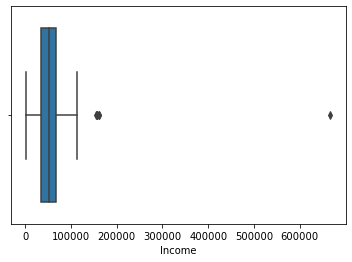

In [48]:
sns.boxplot(df['Income'])

In [49]:
df = df[df['Income'] < 153924]

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201 entries, 0 to 2232
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2201 non-null   int64         
 1   Year_Birth           2201 non-null   int64         
 2   Education            2201 non-null   object        
 3   Marital_Status       2201 non-null   object        
 4   Income               2201 non-null   int64         
 5   Kidhome              2201 non-null   int64         
 6   Teenhome             2201 non-null   int64         
 7   Dt_Customer          2201 non-null   datetime64[ns]
 8   Recency              2201 non-null   int64         
 9   MntWines             2201 non-null   int64         
 10  MntFruits            2201 non-null   int64         
 11  MntMeatProducts      2201 non-null   int64         
 12  MntFishProducts      2201 non-null   int64         
 13  MntSweetProducts     2201 non-nul

# Analisa

### Menambah kolom umur

In [51]:
df["Age"] = 2014 - df["Year_Birth"]
df[["Age"]]

,Age
0,57
1,60
2,49
3,30
4,33
...,...
2228,47
2229,68
2230,33
2231,58


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201 entries, 0 to 2232
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2201 non-null   int64         
 1   Year_Birth           2201 non-null   int64         
 2   Education            2201 non-null   object        
 3   Marital_Status       2201 non-null   object        
 4   Income               2201 non-null   int64         
 5   Kidhome              2201 non-null   int64         
 6   Teenhome             2201 non-null   int64         
 7   Dt_Customer          2201 non-null   datetime64[ns]
 8   Recency              2201 non-null   int64         
 9   MntWines             2201 non-null   int64         
 10  MntFruits            2201 non-null   int64         
 11  MntMeatProducts      2201 non-null   int64         
 12  MntFishProducts      2201 non-null   int64         
 13  MntSweetProducts     2201 non-nul

# 1. Apakah perusahaan mengalami churn?

In [53]:
def Churn_dec (x):
    if x < 30 :
        return 'No'
    else :
        return 'Yes'

In [54]:
df.insert(1, column='Churn',value=df['Recency'].apply(Churn_dec))

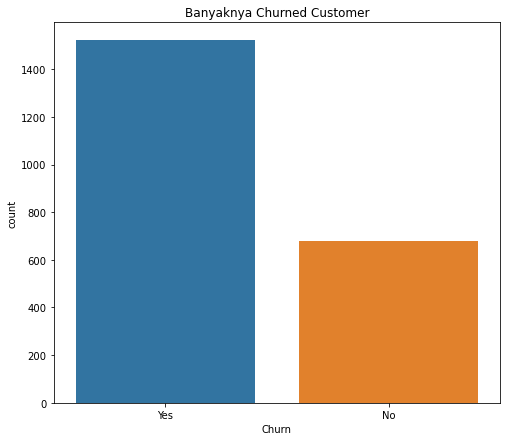

In [55]:
plt.figure(figsize=(8,7))
sns.countplot(df['Churn'])
plt.title("Banyaknya Churned Customer")
plt.show()

Dilansir dari investopedia, churn rate adalah tingkat pelanggan berhenti melakukan hubungan bisnis dengan lembaga/perusahaan. Biasanya, churn rate dijelaskan sebagai persentase dari pelanggan yang memberhentikan layanan langganannya dengan periode waktu yang di tentukan.

Grafik di atas menjelaskan mengenai customer yang churned dan not churned. Data tersebut di atas didapat dari jumlah recency yang menjelaskan waktu terakhir kali customer belanja dari perusahaan, dengan periode waktu yang ditentukan adalah 1 bulan (30 hari). 

Dari grafik di atas menunjukkan bahwa perusahaan mengalami **churn**.

# 2. Apakah tingkat pendapatan pelanggan mempengaruhi churn rate?

In [56]:
def Income_dec (x):
    if x<=df.describe()['Income_2yr']['25%'] :
        return 'Below'
    elif x<=df.describe()['Income_2yr']['50%'] :
        return 'Low Income'
    elif x<=df.describe()['Income_2yr']['75%'] :
        return 'Middle Class'
    else :
        return 'Upper Middle Class'

In [57]:
df.insert(1, column='Income_Range',value=df['Income_2yr'].apply(Income_dec))

In [59]:
cross_ch_ic = (pd.crosstab(index=df['Churn'], columns=df['Income_Range'], normalize='columns') * 100).T

In [60]:
cross_ch_ic

Churn,No,Yes
Income_Range,,
Below,31.884058,68.115942
Low Income,30.236794,69.763206
Middle Class,29.272727,70.727273
Upper Middle Class,32.181818,67.818182


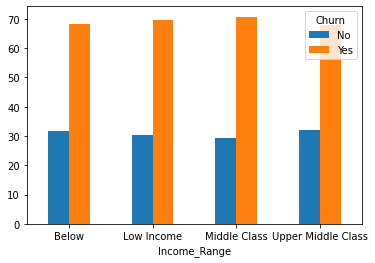

In [61]:
barplot2 = cross_ch_ic.plot.bar(rot=0)

Terlihat bahwa barchart dari ke-4 kelompok tersebut identik, hampir tidak terlihat ada perbedaan. Hal ini menunjukkan bahwa perusahaan mengalami churn, tapi **BUKAN** dari kelompok pendapatan pelanggan. Sehingga, dapat disimpulkan bahwa pendapatan pelanggan **tidak mempengaruhi** terjadinya churn.

# 3. Apakah tingkat pengeluaran pelanggan mempengaruhi churn rate?

In [62]:
def Expence_dec (x):
    if x<=df.describe()['Product_Spent']['50%'] :
        return 'Low Spending'
    else :
        return 'High Spending'

In [63]:
df.insert(1, column='Spending',value=df['Product_Spent'].apply(Expence_dec))

In [64]:
cross_ch_sp = (pd.crosstab(index=df['Churn'], columns=df['Spending'], normalize='columns') * 100).T

In [65]:
cross_ch_sp

Churn,No,Yes
Spending,,
High Spending,30.664240,69.335760
Low Spending,31.125227,68.874773


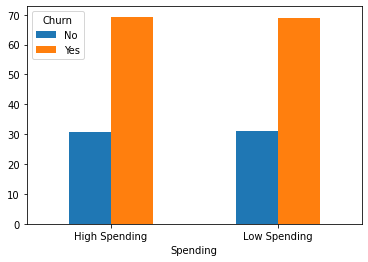

In [66]:
barplot1 = cross_ch_sp.plot.bar(rot=0)

Terlihat bahwa barchart dari ke-2 kelompok pengeluaran tersebut identik, hampir tidak terlihat ada perbedaan. Hal ini menunjukkan bahwa perusahaan mengalami churn, tapi **BUKAN** dari kelompok pengeluaran pelanggan. Sehingga, dapat disimpulkan bahwa pendapatan pelanggan **tidak mempengaruhi** terjadinya churn.

# 4. Apakah promosi yang ditawarkan perusahaan ke pelanggan mempengaruhi churn rate?

In [67]:
Acc_1 = (pd.crosstab(index=[df[df['AcceptedCmp1'] == 1]['AcceptedCmp1']], columns=df[df['AcceptedCmp1'] == 1]['Churn'], normalize='index')*100).round(2)

In [68]:
Acc_1

Churn,No,Yes
AcceptedCmp1,,
1,32.62,67.38


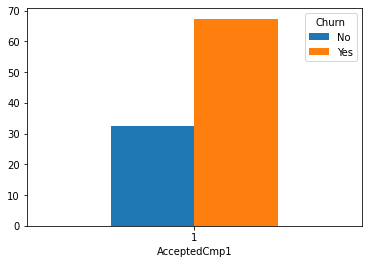

In [69]:
bar_acc1 = Acc_1.plot.bar(rot=0)

Pada barchart di atas menampilkan mengenai promosi yang ditawarkan perusahaan pertama kali ke pelanggan. Dari grafik tersebut, dapat disimpulkan bahwa promosi yang ditawarkan perusahaan pertama kali ke pelanggan **mempengaruhi** terjadinya churn, dengan selisih antara pelanggan yang churn dan yang tidak sebesar **34,76%**.

In [70]:
Acc_2 = (pd.crosstab(index=[df[df['AcceptedCmp2'] == 1]['AcceptedCmp2']], columns=df[df['AcceptedCmp2'] == 1]['Churn'], normalize='index')*100).round(2)

In [71]:
Acc_2

Churn,No,Yes
AcceptedCmp2,,
1,36.67,63.33


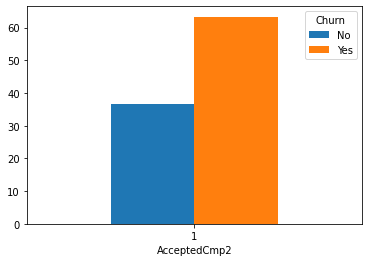

In [72]:
bar_acc2 = Acc_2.plot.bar(rot=0)

Pada barchart di atas menampilkan mengenai promosi yang ditawarkan perusahaan kedua kali ke pelanggan. Dari grafik tersebut, dapat disimpulkan bahwa promosi yang ditawarkan perusahaan kedua kali ke pelanggan **mempengaruhi** terjadinya churn, dengan selisih antara pelanggan yang churn dan yang tidak sebesar **26,66%**.

In [73]:
Acc_3 = (pd.crosstab(index=[df[df['AcceptedCmp3'] == 1]['AcceptedCmp3']], columns=df[df['AcceptedCmp3'] == 1]['Churn'], normalize='index')*100).round(2)

In [74]:
Acc_3

Churn,No,Yes
AcceptedCmp3,,
1,34.36,65.64


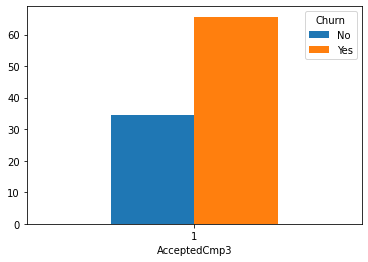

In [75]:
bar_acc3 = Acc_3.plot.bar(rot=0)

Pada barchart di atas menampilkan mengenai promosi yang ditawarkan perusahaan ketiga kali ke pelanggan. Dari grafik tersebut, dapat disimpulkan bahwa promosi yang ditawarkan perusahaan ketiga kali ke pelanggan **mempengaruhi** terjadinya churn, dengan selisih antara pelanggan yang churn dan yang tidak sebesar **31,28%**.

In [76]:
Acc_4 = (pd.crosstab(index=[df[df['AcceptedCmp4'] == 1]['AcceptedCmp4']], columns=df[df['AcceptedCmp4'] == 1]['Churn'], normalize='index')*100).round(2)

In [77]:
Acc_4

Churn,No,Yes
AcceptedCmp4,,
1,30.49,69.51


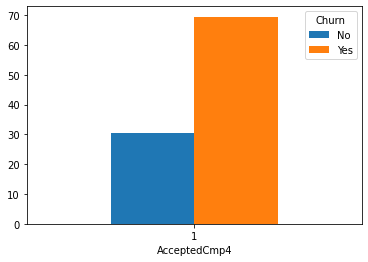

In [78]:
bar_acc4 = Acc_4.plot.bar(rot=0)

Pada barchart di atas menampilkan mengenai promosi yang ditawarkan perusahaan keempat kali ke pelanggan. Dari grafik tersebut, dapat disimpulkan bahwa promosi yang ditawarkan perusahaan keempat kali ke pelanggan **mempengaruhi** terjadinya churn, dengan selisih antara pelanggan yang churn dan yang tidak sebesar **39,02%**.

In [79]:
Acc_5 = (pd.crosstab(index=[df[df['AcceptedCmp5'] == 1]['AcceptedCmp5']], columns=df[df['AcceptedCmp5'] == 1]['Churn'], normalize='index')*100).round(2)

In [80]:
Acc_5

Churn,No,Yes
AcceptedCmp5,,
1,32.5,67.5


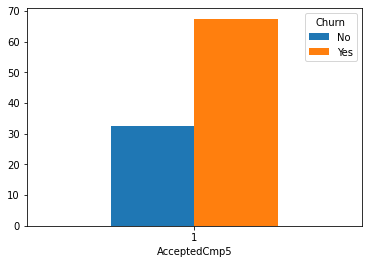

In [81]:
bar_acc5 = Acc_5.plot.bar(rot=0)

Pada barchart di atas menampilkan mengenai promosi yang ditawarkan perusahaan kelima kali ke pelanggan. Dari grafik tersebut, dapat disimpulkan bahwa promosi yang ditawarkan perusahaan keempat kali ke pelanggan **mempengaruhi** terjadinya churn, dengan selisih antara pelanggan yang churn dan yang tidak sebesar **35%**.

In [82]:
Acc_Last = (pd.crosstab(index=[df[df['Response'] == 1]['Response']], columns=df[df['Response'] == 1]['Churn'], normalize='index')*100).round(2)

In [83]:
Acc_Last

Churn,No,Yes
Response,,
1,49.7,50.3


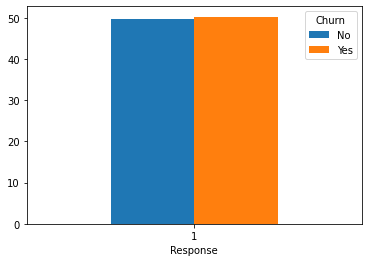

In [84]:
bar_accLast = Acc_Last.plot.bar(rot=0)

Pada barchart di atas menampilkan mengenai promosi yang ditawarkan perusahaan terakhir kali ke pelanggan. Dari grafik tersebut, dapat disimpulkan bahwa promosi yang ditawarkan perusahaan terakhir kali ke pelanggan **mempengaruhi** terjadinya churn, dengan selisih antara pelanggan yang churn dan yang tidak sebesar **0,6%**.

Selisih terbesar terjadi pada promosi keempat sebesar 39,02%. Hal ini menunjukkan bahwa pada pelanggan memutuskan untuk menjadi churn paling banyak pada saat dilakukan promosi keempat dibandingkan promosi yang lainnya. Salah satu alasan mengapa terjadi churn adalah taktik komunikasi yang tidak menarik dan cenderung mengganggu menyebabkan pelanggan menarik diri mereka (retentionscience). Mengirim informasi yang sama sekali tidak relevan kepada pelanggan hanya akan membuat perusahaan tampak mengganggu dalam jangka pendek dan tidak mengerti apa-apa dalam jangka panjang. 

Untuk langkah selanjutnya, untuk metode promosi dapat diganti menggunakan email. Email promosi yang dikirimkan dibuat tanpa harus mengganggu pelanggan dengan spam. Selain itu, promosi ini juga dilakukan sebagai jawaban dari permasalahan pelanggan. Salah satu cara adalah menggunakan Machine Learning untuk melakukan prediksi produk apa yang kemungkinan besar akan dibutuhkan oleh pelanggan.

# 5. Apakah tingkat pendidikan pelanggan mempengaruhi churn rate?

In [85]:
cross_ch_ed = (pd.crosstab(index=df['Churn'], columns=df['Education'], normalize='columns') * 100).T.round(2)

In [86]:
cross_ch_ed

Churn,No,Yes
Education,,
Postgraduate,30.84,69.16
Undergraduate,31.35,68.65


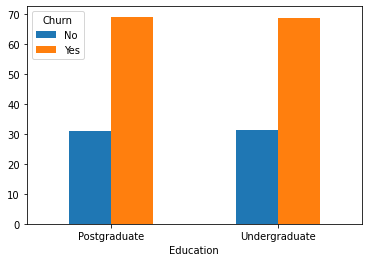

In [87]:
barplot3 = cross_ch_ed.plot.bar(rot=0)

Terlihat bahwa barchart dari ke-2 kelompok pendidikan tersebut identik, hampir tidak terlihat ada perbedaan. Hal ini menunjukkan bahwa perusahaan mengalami churn, tapi **BUKAN** dari pengaruh tingkat pendidikan. Sehingga, dapat disimpulkan bahwa tingkat pendidikan pelanggan **tidak mempengaruhi** terjadinya churn.

# 6. Apakah status pernikahan pelanggan mempengaruhi churn rate?

In [88]:
cross_ch_ms = (pd.crosstab(index=df['Churn'], columns=df['Marital_Status'], normalize='columns') * 100).T.round(2)

In [89]:
cross_ch_ms

Churn,No,Yes
Marital_Status,,
Married,31.45,68.55
Single,29.89,70.11


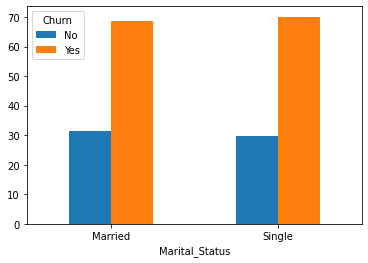

In [90]:
barplot4 = cross_ch_ms.plot.bar(rot=0)

Terlihat bahwa barchart dari ke-2 kelompok status pernikahan tersebut identik, hampir tidak terlihat ada perbedaan. Hal ini menunjukkan bahwa perusahaan mengalami churn, tapi **BUKAN** dari pengaruh status pernikahan. Sehingga, dapat disimpulkan bahwa status pernikahan pelanggan **tidak mempengaruhi** terjadinya churn.

# 7. Apakah keluhan dari pelanggan mempengaruhi churn rate?

In [91]:
Cross_complain = (pd.crosstab(index=[df[df['Complain'] == 1]['Complain']], columns=df[df['Complain'] == 1]['Churn'], normalize='index')*100).round(2)

In [92]:
Cross_complain

Churn,No,Yes
Complain,,
1,25.0,75.0


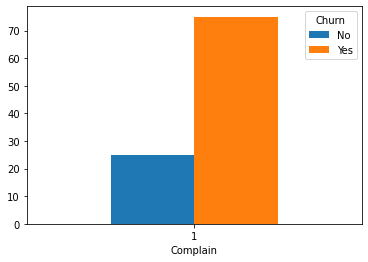

In [93]:
barplot_complain = Cross_complain.plot.bar(rot=0)

Pada barchart di atas menampilkan mengenai pengaruh keluhan pelanggan terhadap churn. Dari grafik tersebut, dapat disimpulkan bahwa keluhan pelanggan terhadap perusahaan **mempengaruhi** terjadinya churn, dengan selisih antara pelanggan yang churn dan yang tidak sebesar **50,0%**. Hal ini menunjukkan bahwa pelanggan memutuskan untuk churn pada saat pelanggan mengajukan keluhan. 

Layanan pelanggan yang buruk sering kali dapat menyebabkan churn yang tinggi (profitwell). Solusi yang dapat diberikan untuk mengurangi angka churn akibat dari banyaknya keluhan pelanggan adalah dengan cara membuat customer support secara real-time, baik secara online maupun offline. Melakukan interaksi dengan pelanggan dalam membantu memecahkan masalah yang dihadapi oleh pelanggan. (Entrepreneur Asia Pacific)

# 8. Apakah tempat belanja mempengaruhi churn rate?

In [94]:
def Web_Pur (x):
    if x<=df.describe()['NumWebPurchases']['50%'] :
        return 'Low Purchase'
    else :
        return 'High Purchase'

In [95]:
df.insert(1, column='Web_Purchases',value=df['NumWebPurchases'].apply(Web_Pur))

In [96]:
cross_ch_web = ((pd.crosstab(index=df['Churn'], columns=df['Web_Purchases'], normalize='columns') * 100).T).round(2)

In [97]:
cross_ch_web

Churn,No,Yes
Web_Purchases,,
High Purchase,32.22,67.78
Low Purchase,30.08,69.92


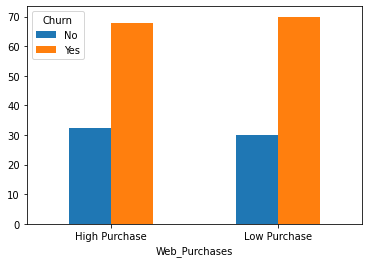

In [98]:
barplot_web = cross_ch_web.plot.bar(rot=0)

Terlihat bahwa barchart dari ke-2 kelompok tersebut identik, hampir tidak terlihat ada perbedaan. Hal ini menunjukkan bahwa perusahaan mengalami churn, tapi **BUKAN** akibat dari pembelian melalui website. Sehingga, dapat disimpulkan bahwa kelompok pembelian melalui website **tidak mempengaruhi** terjadinya churn.

In [99]:
def Cat_Pur (x):
    if x<=df.describe()['NumCatalogPurchases']['50%'] :
        return 'Low Purchases'
    else :
        return 'High Purchases'

In [100]:
df.insert(1, column='Catalog_Purchases',value=df['NumCatalogPurchases'].apply(Cat_Pur))

In [101]:
cross_ch_cat = ((pd.crosstab(index=df['Churn'], columns=df['Catalog_Purchases'], normalize='columns') * 100).T).round(2)

In [102]:
cross_ch_cat

Churn,No,Yes
Catalog_Purchases,,
High Purchases,31.11,68.89
Low Purchases,30.76,69.24


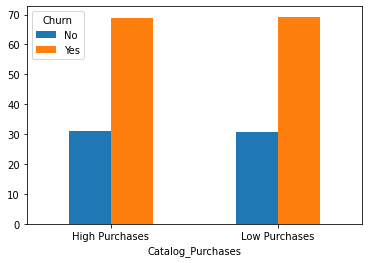

In [103]:
barplot_cat = cross_ch_cat.plot.bar(rot=0)

Terlihat bahwa barchart dari ke-2 kelompok tersebut identik, hampir tidak terlihat ada perbedaan. Hal ini menunjukkan bahwa perusahaan mengalami churn, tapi **BUKAN** akibat dari pembelian catalog. Sehingga, dapat disimpulkan bahwa kelompok pembelian melalui catalog **tidak mempengaruhi** terjadinya churn.

In [104]:
def Str_Pur (x):
    if x<=df.describe()['NumStorePurchases']['50%'] :
        return 'Low Purchases'
    else :
        return 'High Purchases'

In [105]:
df.insert(1, column='Store_Purchases',value=df['NumStorePurchases'].apply(Str_Pur))

In [106]:
cross_ch_str = ((pd.crosstab(index=df['Churn'], columns=df['Store_Purchases'], normalize='columns') * 100).T).round(2)

In [107]:
cross_ch_str

Churn,No,Yes
Store_Purchases,,
High Purchases,31.67,68.33
Low Purchases,30.30,69.70


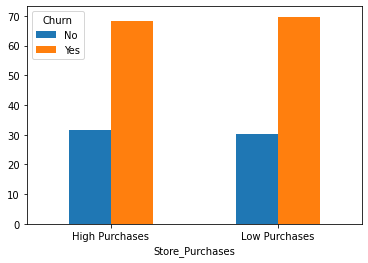

In [108]:
barplot_str = cross_ch_str.plot.bar(rot=0)

Terlihat bahwa barchart dari ke-2 kelompok tersebut identik, hampir tidak terlihat ada perbedaan. Hal ini menunjukkan bahwa perusahaan mengalami churn, tapi **BUKAN** akibat dari pembelian on-site. Sehingga, dapat disimpulkan bahwa kelompok pembelian melalui on-site **tidak mempengaruhi** terjadinya churn.

In [109]:
# df.to_excel("marketing_campaign_churn.xlsx")